In [2]:
import pandas as pd

from google.colab import files




In [3]:
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
new_file=list(uploaded.keys())[0]
df=pd.read_csv(new_file)

In [37]:
# View column names, data types, and first few rows
#print(df.dtypes)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
# Check for nulls
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


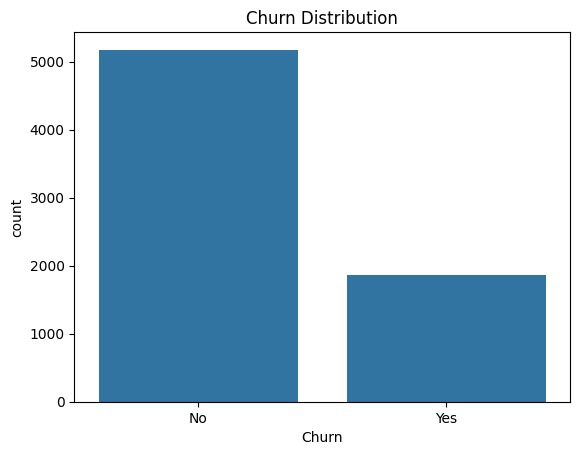

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


<ipython-input-9-456d0cfbdeed>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


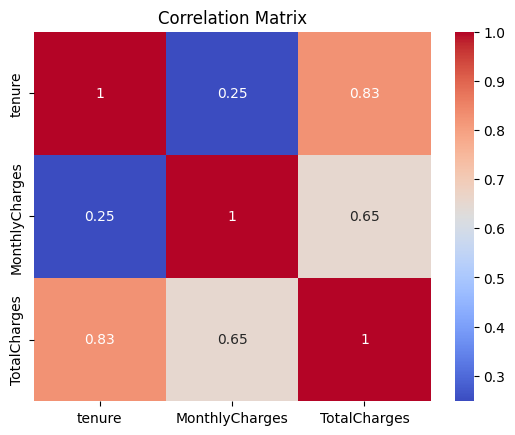

In [9]:
# Convert 'TotalCharges' to numeric (may contain spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Correlation matrix
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn']]


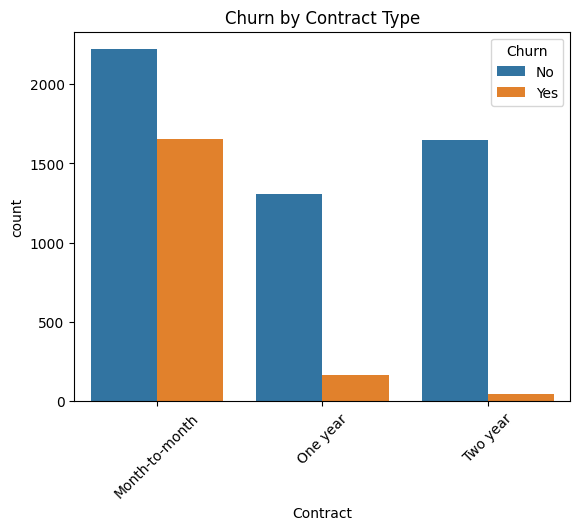

In [11]:
# Countplot grouped by contract type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


In [38]:
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [14]:
# View processed dataset
print(df_encoded.head())


   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.994242        False   
1              0  0.066327       -0.259629     -0.173244         True   
2              0 -1.236724       -0.362660     -0.959674         True   
3              0  0.514251       -0.746535     -0.194766         True   
4              0 -1.236724        0.197365     -0.940470        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2             

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# Define input shape
input_shape = (df_encoded.shape[1] - 1,)  # Minus 1 because 'Churn_Yes' is the target

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Split features and target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [19]:
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7380 - loss: 0.5196

177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7381 - loss: 0.5194 - val_accuracy: 0.7821 - val_loss: 0.4763
Epoch 2/50
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4419

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7852 - loss: 0.4427 - val_accuracy: 0.7835 - val_loss: 0.4472
Epoch 3/50
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4512

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7804 - loss: 0.4509 - val_accuracy: 0.7885 - val_loss: 0.4399
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.4230 - val_accuracy: 0.7935 - val_loss: 0.4402
Epoch 5/50
170/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.4327

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7853 - loss: 0.4328 - val_accuracy: 0.7892 - val_loss: 0.4372
Epoch 6/50
161/177 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8010 - loss: 0.4251

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8004 - loss: 0.4258 - val_accuracy: 0.7821 - val_loss: 0.4366
Epoch 7/50
171/177 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 0.4270

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7983 - loss: 0.4269 - val_accuracy: 0.7857 - val_loss: 0.4351
Epoch 8/50
171/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4274

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8048 - loss: 0.4275 - val_accuracy: 0.7892 - val_loss: 0.4287
Epoch 9/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8004 - loss: 0.4218 - val_accuracy: 0.7899 - val_loss: 0.4318
Epoch 10/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8037 - loss: 0.4201 - val_accuracy: 0.7963 - val_loss: 0.4295
Epoch 11/50
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4300

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7895 - loss: 0.4297 - val_accuracy: 0.7871 - val_loss: 0.4286
Epoch 12/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8084 - loss: 0.4140 - val_accuracy: 0.7949 - val_loss: 0.4302
Epoch 13/50
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4198

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4198 - val_accuracy: 0.7942 - val_loss: 0.4280
Epoch 14/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - loss: 0.4259 - val_accuracy: 0.7928 - val_loss: 0.4286
Epoch 15/50
161/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4224

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7965 - loss: 0.4222 - val_accuracy: 0.7963 - val_loss: 0.4265
Epoch 16/50
159/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4184

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8043 - loss: 0.4184 - val_accuracy: 0.7956 - val_loss: 0.4263
Epoch 17/50
171/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4098

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4101 - val_accuracy: 0.7913 - val_loss: 0.4248
Epoch 18/50
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.4132

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.4133 - val_accuracy: 0.7956 - val_loss: 0.4238
Epoch 19/50
172/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4145

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8002 - loss: 0.4145 - val_accuracy: 0.7906 - val_loss: 0.4238
Epoch 20/50
176/177 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8185 - loss: 0.4052

177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8184 - loss: 0.4053 - val_accuracy: 0.7899 - val_loss: 0.4234
Epoch 21/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8058 - loss: 0.4053 - val_accuracy: 0.7949 - val_loss: 0.4264
Epoch 22/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8101 - loss: 0.4109 - val_accuracy: 0.7928 - val_loss: 0.4242
Epoch 23/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4179 - val_accuracy: 0.7942 - val_loss: 0.4240
Epoch 24/50
171/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4243

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4238 - val_accuracy: 0.7970 - val_loss: 0.4227
Epoch 25/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8118 - loss: 0.4126 - val_accuracy: 0.7956 - val_loss: 0.4259
Epoch 26/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 0.4036 - val_accuracy: 0.7999 - val_loss: 0.4240
Epoch 27/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4128 - val_accuracy: 0.7984 - val_loss: 0.4240
Epoch 28/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8142 - loss: 0.4000 - val_accuracy: 0.7999 - val_loss: 0.4234
Epoch 29/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.4075 - val_accuracy: 0.7949 - val_loss: 0.4265


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.3767
Test Accuracy: 0.8297


In [22]:
# Predict probabilities
y_probs = model.predict(X_test)

# Convert probabilities to "Yes"/"No"
y_pred_labels = ['Yes' if prob > 0.5 else 'No' for prob in y_probs.flatten()]

# Show prediction for 5 customers
for i in range(5):
    print(f"Customer {i+1}: Churn Prediction = {y_pred_labels[i]} (Prob: {y_probs[i][0]:.2f})")


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Customer 1: Churn Prediction = Yes (Prob: 0.76)
Customer 2: Churn Prediction = No (Prob: 0.05)
Customer 3: Churn Prediction = No (Prob: 0.00)
Customer 4: Churn Prediction = Yes (Prob: 0.74)
Customer 5: Churn Prediction = No (Prob: 0.01)


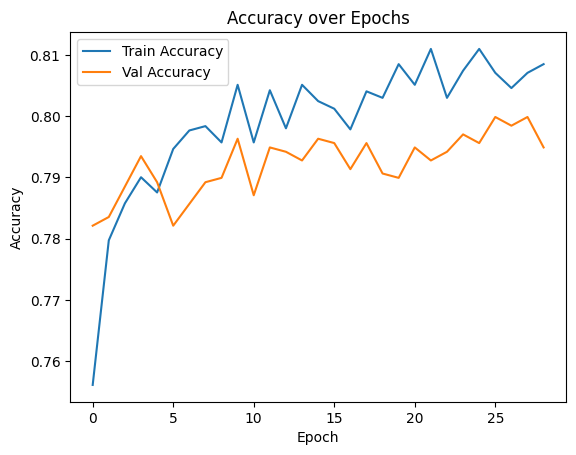

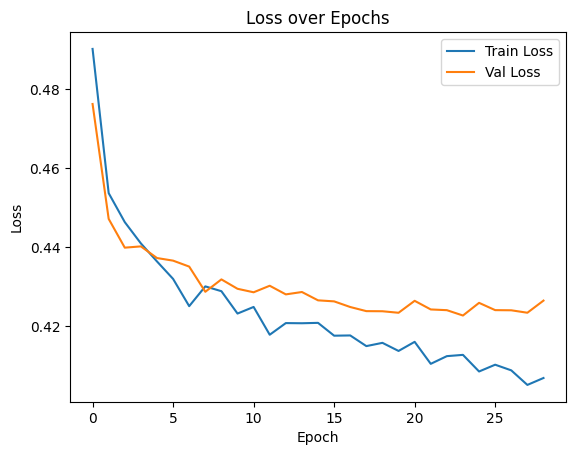

In [23]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


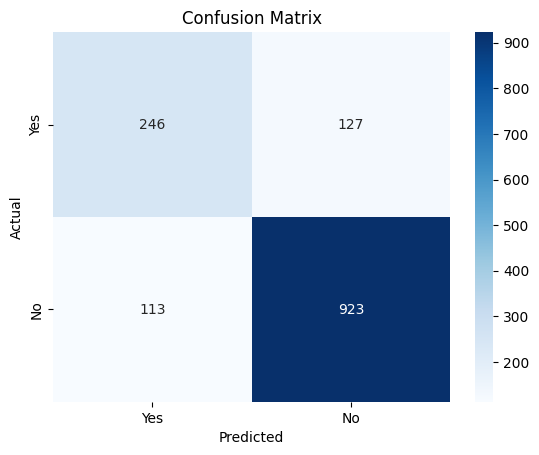

              precision    recall  f1-score   support

          No       0.88      0.89      0.88      1036
         Yes       0.69      0.66      0.67       373

    accuracy                           0.83      1409
   macro avg       0.78      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [24]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns

# Convert true labels to 'Yes'/'No'
y_test_labels = ['Yes' if val == 1 else 'No' for val in y_test]

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Yes', 'No'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
print(classification_report(y_test_labels, y_pred_labels))


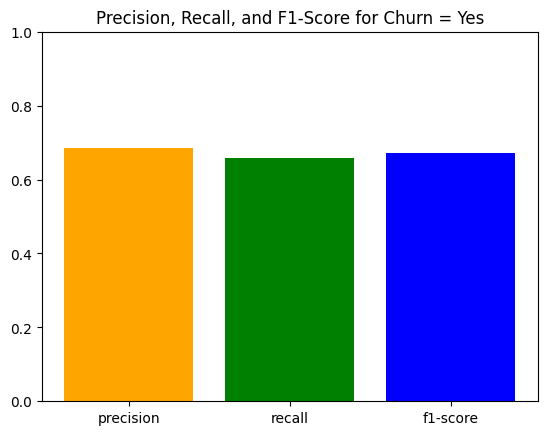

In [25]:
metrics = ['precision', 'recall', 'f1-score']
values = [report['Yes'][metric] for metric in metrics]

plt.bar(metrics, values, color=['orange', 'green', 'blue'])
plt.title('Precision, Recall, and F1-Score for Churn = Yes')
plt.ylim(0, 1)
plt.show()


In [26]:
import numpy as np

# Get predictions and probabilities
probs = model.predict(X_test)
risk_tiers = []

# Map to risk tiers
for prob in probs[:5].flatten():
    if prob > 0.8:
        risk_tiers.append('High Risk')
    elif prob > 0.5:
        risk_tiers.append('Moderate Risk')
    else:
        risk_tiers.append('Low Risk')

# Show predictions with features
sample_data = X_test.iloc[:5].copy()
sample_data['Churn Probability'] = probs[:5]
sample_data['Risk Tier'] = risk_tiers
sample_data['Suggested Action'] = sample_data['Risk Tier'].map({
    'High Risk': 'Offer retention discount + personal follow-up',
    'Moderate Risk': 'Send targeted loyalty offer',
    'Low Risk': 'Maintain engagement through standard comms'
})

print(sample_data[['Churn Probability', 'Risk Tier', 'Suggested Action']])


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
      Churn Probability      Risk Tier  \
185            0.757874  Moderate Risk   
2715           0.045933       Low Risk   
3825           0.004129       Low Risk   
1807           0.739832  Moderate Risk   
132            0.010357       Low Risk   

                                Suggested Action  
185                  Send targeted loyalty offer  
2715  Maintain engagement through standard comms  
3825  Maintain engagement through standard comms  
1807                 Send targeted loyalty offer  
132   Maintain engagement through standard comms  


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Binary labels for evaluation
y_pred_binary = [1 if p > 0.5 else 0 for p in probs]

# Metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.6852
Recall: 0.6595
F1-Score: 0.6721


In [28]:
# Already handled during training with ModelCheckpoint, but you can save again manually
model.save('best_model.h5')
print("Model saved as best_model.h5")


Model saved as best_model.h5


In [29]:
from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model('best_model.h5')

# Predict on new customer(s)
new_customer = X_test.iloc[:1]  # Replace with actual new data when available
new_pred = loaded_model.predict(new_customer)

print(f"Churn probability for new customer: {new_pred[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
Churn probability for new customer: 0.76


In [31]:
pip install shap


In [34]:
# Convert background and input samples to NumPy arrays
background_np = background.to_numpy().astype(float)
X_explain = X_test.iloc[:5].to_numpy().astype(float)


In [35]:
# Prediction function for SHAP
def model_predict(X_np):
    return model.predict(X_np).flatten()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-36-b8191233ba15>:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_explain, feature_names=X_test.columns)


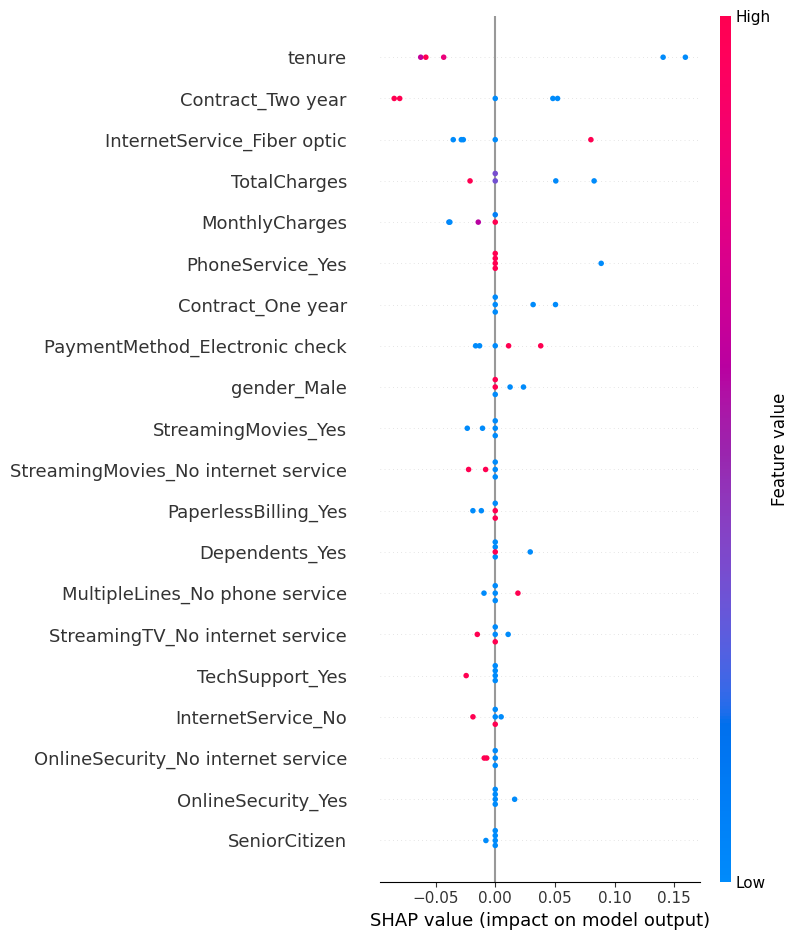

In [36]:
import shap

# KernelExplainer works with any model
explainer = shap.KernelExplainer(model_predict, background_np)

# Compute SHAP values for 5 test samples
shap_values = explainer.shap_values(X_explain, nsamples=100)

# SHAP summary plot
shap.summary_plot(shap_values, X_explain, feature_names=X_test.columns)


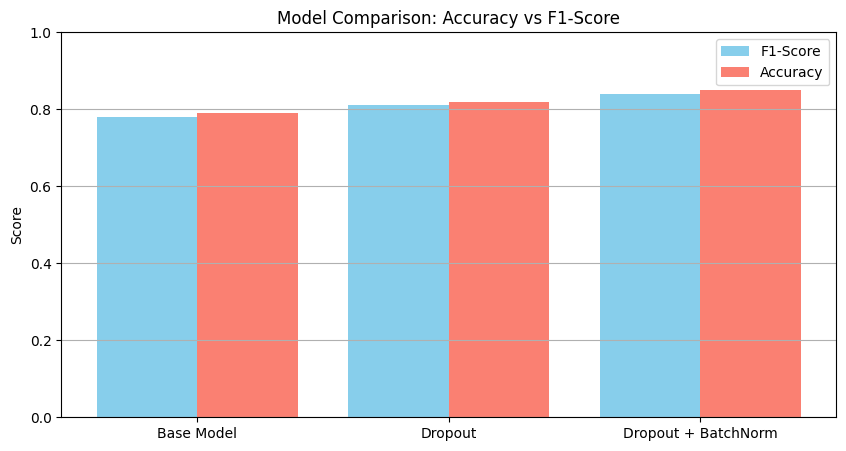

In [41]:
import matplotlib.pyplot as plt

# Example values — replace with real results
models = ['Base Model', 'Dropout', 'Dropout + BatchNorm']
f1_scores = [0.78, 0.81, 0.84]  # Replace with your actual F1-scores
accuracy_scores = [0.79, 0.82, 0.85]  # Replace as needed

# Plot
x = range(len(models))
plt.figure(figsize=(10, 5))

# F1-Score Bar Chart
plt.bar(x, f1_scores, color='skyblue', width=0.4, align='center', label='F1-Score')
plt.bar([i + 0.4 for i in x], accuracy_scores, color='salmon', width=0.4, align='center', label='Accuracy')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1-Score')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
